### Chemical Structure Alignment

Molecular alignment is a fundamental problem in cheminformatics and can be used for  structure  determination,  similarity  based  searching, and ligand-based drug design. This problem can be formulated as an orthogonal Procrustes problem where the two matrices represent three-dimensional Cartesian coordinates of molecules.

> **Orthogonal Procrustes**
>
> Given matrix $\mathbf{A}_{m \times n}$ and a reference $\mathbf{B}_{m \times n}$, find the find the orthogonal transformation matrix $\mathbf{Q}_{n \times n}$ that makes $\mathbf{A}$ as close as possible to $\mathbf{B}$, i.e.,
>
\begin{equation}
       \underbrace{\min}_{\left\{\mathbf{Q} | \mathbf{Q}^{-1} = {\mathbf{Q}}^\dagger \right\}}
                          \|\mathbf{A}\mathbf{Q} - \mathbf{B}\|_{F}^2
\end{equation}


In the code block below, we use the `procrustes` library for protein structure alignment. We use the 2HHB, which has cyclic-$C_2$ global symmetry, and load its PDB file using [IOData library](https://github.com/theochem/iodata) to obtain the 3D-Cartesian coordinates atoms. In 2HHB, the A and C (or B and D) are hemoglobin deoxy-alpha (beta) chains shown in **Fig. (i)**, and their $C_{\alpha}$ atoms in **Fig. (ii)** are aligned in **Fig. (iii)** to show that they are homologous. The results in **Fig. (iii)** are obtained with orthogonal Procrustes which implements the *Kabsch* algorithm. The root-mean-square deviation (RMSD) is used to assess the discrepancy between structures before and after the translation-rotation transformation.


![Fig. 1. protein structure alignment with rotational Procrustes.](notebook_data/chemical_strcuture_alignment/protein_alignment.png "Fig. 1. protein structure alignment with rotational Procrustes.")

#### Download IOData & Matplotlib Libraries & Example Files

- Install [IOData library](https://github.com/theochem/iodata) and Matplotlib, if there are not available on your system; this is required on Binder.
- Download [2hhb.pdb](https://github.com/theochem/procrustes/blob/master/doc/notebooks/notebook_data/chemical_strcuture_alignment/2hhb.pdb?raw=true?) file used in the example below which is stored in [Procrustes GitHub repository example files](https://github.com/theochem/procrustes/tree/master/doc/notebooks/notebook_data/chemical_strcuture_alignment).

In [ ]:
# If needed, install IOData library (this is required on Binder)

import sys

# See https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
!{sys.executable} -m pip install qc-iodata
!{sys.executable} -m pip install matplotlib

In [ ]:
# If needed, download the example files
import os
from urllib.request import urlretrieve

fpath = "notebook_data/chemical_strcuture_alignment/"
if not os.path.exists(fpath):
    os.makedirs(fpath, exist_ok=True)

urlretrieve(
    "https://raw.githubusercontent.com/theochem/procrustes/master/doc/notebooks/notebook_data/chemical_strcuture_alignment/2hhb.pdb",
    os.path.join(fpath, "2hhb.pdb")
    )

#### Procrustes Analysis

In [1]:
# chemical structure alignment with orthogonal Procrustes
from pathlib import Path

import numpy as np    
from iodata import load_one
from iodata.utils import angstrom
from procrustes import rotational

# load PDB
pdb = load_one(Path("notebook_data/chemical_strcuture_alignment/2hhb.pdb"))

# get coordinates of C_alpha atoms in chains A & C (in angstrom)
chainid = pdb.extra['chainids']
attypes = pdb.atffparams['attypes']
# alpha carbon atom coordinates in chain A
ca_a = pdb.atcoords[(chainid == 'A') & (attypes == 'CA')] / angstrom
# alpha carbon atom coordinates in chain A
ca_c = pdb.atcoords[(chainid == 'C') & (attypes == 'CA')] / angstrom

# compute root-mean-square deviation of original chains A and C 
rmsd_before = np.sqrt(np.mean(np.sum((ca_a - ca_c)**2, axis=1)))
print("RMSD of initial coordinates:", rmsd_before)

# rotational Procrustes analysis
result = rotational(ca_a, ca_c, translate=True)

# compute transformed (translated & rotated) coordinates of chain A
ca_at = np.dot(result.new_a, result.t)

# compute root-mean-square deviation of trainsformed chains A and C 
rmsd_after = np.sqrt(np.mean(np.sum((ca_at - result.new_b)**2, axis=1)))
print("RMSD of transformed coordinates:", rmsd_after)

RMSD of initial coordinates: 39.46851987559469
RMSD of transformed coordinates: 0.23003870483785113


#### Plot Procrustes Results

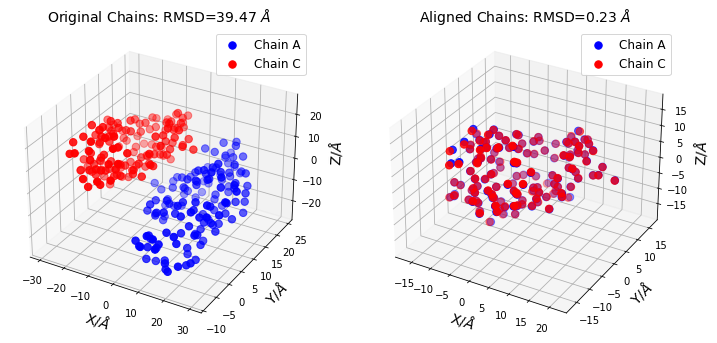

In [2]:
# Plot outputs of Procrustes

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))

# =============
# First Subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# coordinates of chains A & C (before alignment)
coords1, coords2 = ca_a, ca_c
title = "Original Chains: RMSD={:0.2f} $\AA$".format(rmsd_before)

ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
           marker="o", color="blue", s=55, label="Chain A")
ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
           marker="o", color="red", s=55, label="Chain C")

ax.set_xlabel("X/$\AA$", fontsize=14)
ax.set_ylabel("Y/$\AA$", fontsize=14)
ax.set_zlabel("Z/$\AA$", fontsize=14)
ax.legend(fontsize=12, loc="best")
plt.title(title, fontsize=14)


# ==============
# Second Subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# coordinates of chains A & C after translation and rotation
coords1, coords2 = ca_at, result.new_b
title="Aligned Chains: RMSD={:0.2f} $\AA$".format(rmsd_after)

ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
           marker="o", color="blue", s=55, label="Chain A")
ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
           marker="o", color="red", s=55, label="Chain C")

ax.set_xlabel("X/$\AA$", fontsize=14)
ax.set_ylabel("Y/$\AA$", fontsize=14)
ax.set_zlabel("Z/$\AA$", fontsize=14)
ax.legend(fontsize=12, loc="best")
plt.title(title, fontsize=14)

plt.show()